In [26]:
"""Import relevant libraries"""
import os
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt # Not necessary in Jupyter Notebook
import datetime as dt

In [27]:
"""User Input"""
### Values that are entered and stored in the code for easy recall
file = 'od_data.xlsx'
header_row = 27
last_row = 108
index_column = 1

letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # Establish letters to be used throughout the script
invalid_resp = True # while loop control variable

while invalid_resp: # Loops if 'neworold' input is invalid
    ### Shows current code-stored file and asks if the user would like to choose another
    neworold = input(f'Current stored file is {file}\nWould you like to select a new file? (y/n)\n: ').lower() # Make sure the input is lowercase

    if neworold == 'y':      # If a new file is being selected
        invalid_resp = False # A valid response has been entered
        
        while True: # Loops if 'file' input is invalid
            try:
                file = input('Enter the excel file name.\n: ')
                file_path = os.path.realpath(file) # Gets the full file path. If the file doesn't exist, exception is raised
                break
                ### This code can be used for file selection prompt, if it is prefered over manual user input
#                 root = tk.Tk()
#                 root.withdraw()
#                 file_path = filedialog.askopenfilename(initialdir= os.getcwd(),
#                                                         title= "Please select a file:",
#                                                         filetypes = ('Excel Files','*.xlsx *.xls'))
            except:
                print('Invalid file')
        
        while True: # Loops if any of the following inputs is not an integer
            try:
                header_row = int(input('Enter the row number (as (+)int.) with the column labels (i.e. header row)\n: '))-1
                last_row = int(input('Enter the last row number of the data block (as (+)int.)\n: '))
                index_column = letters.index(input('Enter the letter of the column with the independent variable you would like to plot (e.g. time)\n: ').upper())
                break
            except:
                print('Invalid input')
              
    elif neworold == 'n':                  # If the code-stored file is being used
        file_path = os.path.realpath(file) # Gets full file path and checks if the file is valid
        invalid_resp = False               # A valid response has been entered
    else:
        print('Invalid input!\nPlease respond with \"y\" or \"n\"')

"""Import excel file"""
df = pd.read_excel(file_path,header = header_row) # Read excel file and store as a pandas dataframe
df.head(5)

Current stored file is od_data.xlsx
Would you like to select a new file? (y/n)
: n


,Unnamed: 0,Time,T° 600,A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,NaN,00:00:00,36.9,0.093,0.437,0.447,0.467,0.452,0.483,0.392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,00:15:00,37,0.093,0.447,0.459,0.485,0.458,0.487,0.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,00:30:00,37,0.092,0.463,0.476,0.51,0.471,0.499,0.427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:45:00,37,0.093,0.481,0.493,0.534,0.483,0.511,0.446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,01:00:00,37,0.092,0.498,0.509,0.554,0.493,0.524,0.462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
"""Data cleaning"""
'''Data extraction'''
data = df.loc[:(last_row - header_row),:]       # Select out the relevant data & store in new dataframe
# data.index.name = None                                      # Can be used to erase the index column name, if desired
data = data.dropna(axis='columns', how='all')     # Drops all columns where more than half of the values are not valid

###Convert time to decimal hours format (only works for <24h run)
for i,item in enumerate(data['Time']):
    temp = dt.time.fromisoformat(str(data['Time'].iloc[i]))    
    data['Time'].iloc[i] = float(temp.hour + (temp.minute/60))
data.index = data['Time']         # Set approriate row names by calling them from df dataframe

data.head(5)

C:\Users\Mogma\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Time,T° 600,A1,A2,A3,A4,A5,A6,A7,A8,...,B9,C1,C2,C3,C4,C5,C6,C7,C8,C9
Time,,,,,,,,,,,,,,,,,,,,,
0.00,0,36.9,0.093,0.437,0.447,0.467,0.452,0.483,0.392,0.428,...,0.450,0.094,0.442,0.453,0.448,0.466,0.495,0.401,0.440,0.449
0.25,0.25,37,0.093,0.447,0.459,0.485,0.458,0.487,0.407,0.439,...,0.459,0.094,0.457,0.464,0.463,0.471,0.501,0.416,0.462,0.463
0.50,0.5,37,0.092,0.463,0.476,0.51,0.471,0.499,0.427,0.456,...,0.479,0.093,0.476,0.481,0.489,0.485,0.516,0.437,0.493,0.492
0.75,0.75,37,0.093,0.481,0.493,0.534,0.483,0.511,0.446,0.472,...,0.499,0.094,0.493,0.499,0.512,0.498,0.532,0.456,0.523,0.521
1.00,1,37,0.092,0.498,0.509,0.554,0.493,0.524,0.462,0.485,...,0.515,0.093,0.511,0.515,0.531,0.507,0.546,0.472,0.547,0.545


In [29]:
'''User input exceptions'''
### Allows the user to enter new data for a new file or calls stored data for the stored file
if neworold == 'y':
    while True: # Loops if 'drop_names' input is invalid or the user isn't finished inputting
        try:
            drop_names = input('Enter the name(s) of the column(s) that you would like to drop.\nPress \'enter\' after each entry.\nEnter \"done\" when finished.\n: ')
            if drop_names.lower() == 'done': # If the user is done entering values...
                break                        # Break the loop
            data.drop(columns=drop_names)    # Otherwise, drop the specified columns
        except:
            print('Invalid Input')

    while True: # Loops if 'replicates' input is invalid
        try:
            replicates = int(input('How many replicates?\nEnter as a positive integer\n: '))
            break
        except:
            print('Invalid input')

    while True:
        try:
            columns = int(input('How many data columns per replicate? (e.g. A1-AX: X=?)\nEnter as a positive integer\n: '))
            break
        except:
            print('Invalid input')

    nc_replicates = [] # Initialize list
    while True:        # Loops if 'nc_rep' input is invalid or the user isn't finished inputting
        try:
            nc_rep = input('Enter the number(s) ((+)int.) of the replicate(s) with the negative control(s) you would like to include.\nPress \'enter\' after each entry.\nEnter \"done\" when finished.\n: ')
            if nc_rep.lower() == 'done':        # If the user is done entering values...
                break                           # Break the loop
    #         int(nc_rep)                         # Otherwise, check is the input is an integer
            nc_replicates.append(int(nc_rep))        # If so, add it to the list
        except:
            print('Invalid input')

    while True:
        try:
            nc_num = int(input('Which data column in each replicate contains the neg. control? (e.g. A1, B1, C1, etc.)\nEnter as a positive integer.\n: '))
            break
        except:
            print('Invalid input')
else:
    replicates = 3
    columns = 9
    nc_replicates = [1,2]
    nc_num = 1
    

In [30]:
"""Calculate & build final data"""

'''Initialize useful dictionary and dataframe'''
avg = {}                   # Used to iteratively set variables
OD_data = pd.DataFrame({}) # Scaffold for final dataframe

'''Control group calculations'''
### Assums that the neg. controls in each replicate are in the same respective column
nc_samples = []
for rep in nc_replicates:
    nc_samples.append(letters[rep-1]+str(nc_num))
OD_data['Control Group'] = data.loc[:,nc_samples].mean(axis=1)

'''Calculations for other groups'''
for n in range(columns-1):                                            # Substract 1 to account for control group
    if n != nc_num-1:                                                 # If the number is not the control group column number...
        samples = []                                                  # Reinitialize list (after each loop) 
        for rep in range(replicates):                                 # For each of the replicates...
            samples.append(letters[rep]+str(n+1))                     # Load the list with the next column in each replicate
        OD_data['Group '+str(n+1)] = data.loc[:,samples].mean(axis=1) # Average the columns and add it to the new dataframe
    
OD_data.index = data.index # Transfer index from old dataframe
OD_data.head(5)

,Control Group,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8
Time,,,,,,,,
0.00,0.0935,0.442667,0.453333,0.455667,0.458000,0.489333,0.398667,0.435333
0.25,0.0930,0.454667,0.463333,0.470000,0.466333,0.495333,0.414000,0.449333
0.50,0.0925,0.472667,0.483333,0.491667,0.483000,0.508667,0.434667,0.472000
0.75,0.0935,0.493000,0.504000,0.512667,0.499000,0.523000,0.454667,0.493667
1.00,0.0925,0.512000,0.522333,0.529667,0.510667,0.536333,0.471000,0.511000


Enter the exact names of the groups you would like to plot (e.g. "Group 2").
To display all groups enter "all",
or enter "done" when finished.
: all


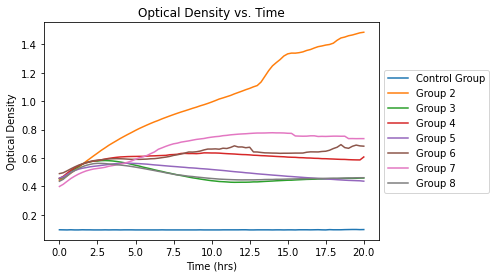

In [37]:
"""Display data plot"""
'''Which groups to plot?'''
groups = [] # Initialize group list
while True:
    try:
        group = input('Enter the exact names of the groups you would like to plot (e.g. \"Group 2\").\nTo display all groups enter \"all\",\nor enter \"done\" when finished.\n: ')

        if group.lower() == 'all':
            groups = list(OD_data.columns.values) # Obtains all of the column names and puts them in a list
            break
        elif group.lower() == 'done':
            break

        check = OD_data[group] # Attempts to call the input group name to check if it is valid
        groups.append(group)   # If it is, it appends the group to the list
    except:
        print('Invalid Input')

'''Display plot'''
plot = OD_data.plot(title = 'Optical Density vs. Time',                # Set title
                    y = groups,                                        # Set the groups to plot
                    xlabel = 'Time (hrs)',                             # Set x-axis label
                    ylabel = 'Optical Density',                        # Set y-axis label
                   )
plot.legend(loc='center left',bbox_to_anchor=(1, 0.5))                 # Set top left of the legend to center right of the plot

plt.show()                                                             # Show the plot (not necessary in Jupyter Notebook)

In [43]:
"""Save plot"""
plot_name = input('\nSave figure as: ')
fig = plot.get_figure()
fig.savefig(plot_name, bbox_inches = 'tight', dpi=500)


Save figure as: testplt
